In [1]:
!pip install glove_python
import sys
import pandas as pd
from sklearn import metrics
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Conv1D,MaxPool1D,GlobalMaxPool1D,Activation,LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re

import nltk
from glove import Corpus, Glove
from nltk.corpus import stopwords
from sklearn import preprocessing
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
from oauth2client.client import GoogleCredentials
import numpy as np
nltk.download('stopwords')

drive.mount('/content/drive')

     |████████████████████████████████| 266kB 3.4MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700248 sha256=16cd64835dbac5bffe1615b600df538ec43afc5ac67fd4bb2d12541b54d3ef65
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [41]:
x=[]
y=[]
folders=['1','2','3']

filename='/content/drive/My Drive/data/3000tweet/raw_texts/'
for a in folders:
    text_count=0
    path=os.path.join(filename, a)
    for t in os.listdir(path):
        text_count+=1
        p2=os.path.join(path, t)
        f=open(p2, 'r',  encoding="cp1254")
        x.append(f.read())
        y.append(a)
        f.close()
    print(a,'. Klasör tweet sayısı :',text_count)

1 . Klasör tweet sayısı : 756
2 . Klasör tweet sayısı : 1287
3 . Klasör tweet sayısı : 957


[[-0.01832352 -0.02301721 -0.03353199 ... -0.19527296 -0.78652928
  -0.83940099]
 [-0.01832352 -0.02301721 -0.03353199 ... -0.71405845  0.09161996
  -0.83884683]
 [-0.01832352 -0.02301721 -0.03353199 ...  0.21548101 -0.79548427
  -0.67204607]
 ...
 [-0.01832352 -0.02301721 -0.03353199 ... -0.69561404 -0.76917897
   2.41016594]
 [-0.01832352 -0.02301721 -0.03353199 ... -0.41982628 -0.79352537
   2.41182841]
 [-0.01832352 -0.02301721 -0.03353199 ...  0.10598565 -0.79184631
  -0.78869577]]
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2400 samples, validate on 600 samples
Epoch 1/60
2400/2400 [==============================] - 2s 859us/step - loss: 0.6185 - accuracy: 0.6771 - val_loss: 0.5521 - val_accuracy: 0.7317
Epoch 2/60
2400/2400 [==============================] - 2s 666us/step - loss: 0.4931 - accuracy: 0.7446 - val_loss: 0.4458 - val_accuracy: 0.7983
Epoch 3/60
2400/2400 [==============================] - 2s 672us/step - loss: 0.4120 - accuracy: 0.7911 - val_loss: 0.3712 - val_accuracy: 0.8156
Epoch 4/60
2400/2400 [==============================] - 2s 665us/step - loss: 0.3699 - accuracy: 0.8283 - val_loss: 0.3668 - val_accuracy: 0.8339
Epoch 5/60
2400/2400 [==============================] - 2s 661us/step - loss: 0.3562 - accuracy: 0.8351 - val_loss: 0.3402 - val_accuracy: 0.8494
Epoch 6/60
2400/2400 [==============================] - 2s 671us/step - loss: 0.3339 - accuracy: 0.8424 - val_loss: 0.3345 - val_accuracy: 0.8417
Epoch 7/60
2400/2400 [==============================] - 2s 667us/step - loss:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


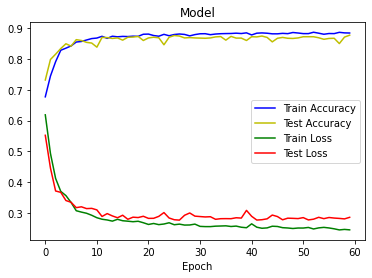

None
[[164   5   0]
 [ 62 194   6]
 [ 25  13 131]]
(<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f6265fbb9b0>)


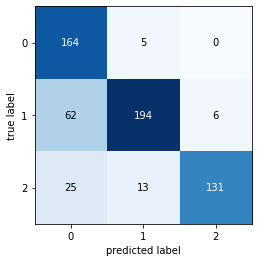

In [42]:

stop_word_list=stopwords.words('turkish')

def preprocess_text(sen):
  
    sentence = re.sub('[\d\s]', ' ', str(sen))
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
    sentence = re.sub(r'\s+', ' ', sentence)
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)  
    return single_doc.lower()

for i in range(len(x)):
    x[i] = preprocess_text(x[i])

words = []
for i in x:
    words.append(i.split())

token = Tokenizer()
token.fit_on_texts(x)
x = token.texts_to_sequences(x)
x = pad_sequences(x)

embeddings_index={}
word_index=token.word_index

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

print(y)
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(y)
y = to_categorical(y)
print(pd.DataFrame(y).sample(5))


corpus=Corpus()
corpus.fit(words, window=20)
eldiven=Glove(no_components=5,learning_rate=.05)
eldiven.fit(corpus.matrix, epochs=30,no_threads=4, verbose=False)
eldiven.add_dictionary(corpus.dictionary)
eldiven.save('eldiven.model')

for word, i in eldiven.dictionary.items():
    eldiven.dictionary[word]=eldiven.word_vectors[i]

for line, i in eldiven.dictionary.items():
    word =line
    coefs=np.asarray(i, dtype='float32')
    embeddings_index[word]=coefs

vocab_size=len(word_index)+1

embedding_matrix=np.zeros((vocab_size,5))
for word, i in word_index.items():
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = Sequential()
model.add(Embedding(vocab_size,5,trainable=True,weights=[embedding_matrix]))
model.add(LSTM(units=128))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
t = model.fit(x_train, y_train, batch_size=128, epochs=60, validation_data=(x_test, y_test))

la_ratio=model.evaluate(x_test,y_test)
print('Loss/Accuracy :', la_ratio)


plt.plot(t.history['accuracy'],color='b', label="Training accuracy")
plt.plot(t.history['val_accuracy'],color='y', label="Test accuracy")
plt.plot(t.history['loss'],color='g', label="Training loss")
plt.plot(t.history['val_loss'],color='r', label="Test accuracy")
plt.title('Model')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy','Test Accuracy','Train Loss','Test Loss'],loc='bottom left')
print(plt.show())

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

rounded_pred = model.predict_classes(x_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
print(confusion_matrix(rounded_labels,rounded_pred))
print(plot_confusion_matrix(conf_mat=confusion_matrix(rounded_labels,rounded_pred)))
